## PCA ##
- Use Multiple Correspondence Analysis (MCA) for Categorical data

Age group: {'20-30': 0, '31-40': 1, '41-50': 2, '51-60': 3}
Gender: {'Female': 0, 'Male': 1, 'Prefer not to say': 2}
Marital status: {'Married with children': 0, 'Married with no children': 1, 'Single': 2}
Deciding factors to buy car: {'Aesthetics;Functionality;Customisable options': 0, 'Brand name;Aesthetics;Functionality;Size': 1, 'Brand name;Technological features;Functionality;Customisable options': 2, 'Brand name;Technological features;Functionality;Sustainability/environment considerations': 3, 'Price': 4, 'Price;Aesthetics': 5, 'Price;Aesthetics;Size': 6, 'Price;Aesthetics;Technological features': 7, 'Price;Aesthetics;Technological features;Customisable options;Sustainability/environment considerations': 8, 'Price;Aesthetics;Technological features;Functionality': 9, 'Price;Aesthetics;Technological features;Functionality;Sustainability/environment considerations': 10, 'Price;Brand name;Aesthetics': 11, 'Price;Brand name;Aesthetics;Functionality;Size': 12, 'Price;Brand name;Aesthe

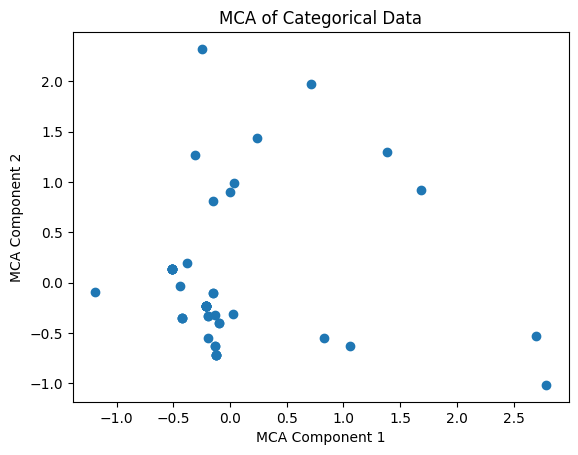

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.543         6.04%                      6.04%
1              0.500         5.56%                     11.59%


In [27]:
import pandas as pd
from prince import MCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../data/cleaned_data.csv')

# Extracting categorical columns
categorical_cols = ['Age group', 'Gender', 'Marital status', 'Deciding factors to buy car', 'Any cadding experience']

# Applying LabelEncoder to transform categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Extract only the categorical columns for MCA
data_for_mca = df[categorical_cols]

# Instantiate and fit MCA
mca = MCA(n_components=2)
mca.fit(data_for_mca)

# Transform the data
X_mca = mca.transform(data_for_mca)

# Plot the MCA results
plt.scatter(X_mca.iloc[:, 0], X_mca.iloc[:, 1])
plt.xlabel('MCA Component 1')
plt.ylabel('MCA Component 2')
plt.title('MCA of Categorical Data')
plt.show()

# Display contributions of categories to the dimensions
print(mca.contributions_)
